In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#MODELO 1: Regresión logística
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score


## DATAFRAME

In [2]:
df = pd.read_csv("../data/processed/limpio1.csv")
df.head(1)

Stress  Age  Hair Loss  Genetics_encoder  Hormones_encoder  \
0       1   19          0               1.0               0.0   

   HairCare_encoder  Environment_encoder  Smoking_encoder  Weight_encoder  \
0               1.0                  1.0              0.0             0.0   

   Nutritional Deficiencies _Biotin Deficiency   ...  \
0                                         False  ...   

   Medications & Treatments_Antibiotics  \
0                                 False   

   Medications & Treatments_Antidepressants   \
0                                      False   

   Medications & Treatments_Antifungal Cream  \
0                                      False   

   Medications & Treatments_Blood Pressure Medication  \
0                                              False    

   Medications & Treatments_Chemotherapy  \
0                                  False   

   Medications & Treatments_Heart Medication   \
0                                       False   

   Medications & Treatments_Immunomodulators  \
0                                      False   

   Medications & Treatments_No Data  Medications & Treatments_Rogaine  \
0                              True                             False   

   Medications & Treatments_Steroids  
0                              False  

[1 rows x 42 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 42 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Stress                                              999 non-null    int64  
 1   Age                                                 999 non-null    int64  
 2   Hair Loss                                           999 non-null    int64  
 3   Genetics_encoder                                    999 non-null    float64
 4   Hormones_encoder                                    999 non-null    float64
 5   HairCare_encoder                                    999 non-null    float64
 6   Environment_encoder                                 999 non-null    float64
 7   Smoking_encoder                                     999 non-null    float64
 8   Weight_encoder                                      999 non-null    float64
 9  

In [5]:
df.describe()

Stress         Age   Hair Loss  Genetics_encoder  Hormones_encoder  \
count  999.000000  999.000000  999.000000        999.000000         999.00000   
mean     0.993994   34.188188    0.497497          0.522523           0.50951   
std      0.805768    9.377980    0.500244          0.499743           0.50016   
min      0.000000   18.000000    0.000000          0.000000           0.00000   
25%      0.000000   26.000000    0.000000          0.000000           0.00000   
50%      1.000000   34.000000    0.000000          1.000000           1.00000   
75%      2.000000   42.000000    1.000000          1.000000           1.00000   
max      2.000000   50.000000    1.000000          1.000000           1.00000   

       HairCare_encoder  Environment_encoder  Smoking_encoder  Weight_encoder  
count        999.000000           999.000000       999.000000      999.000000  
mean           0.492492             0.508509         0.519520        0.472472  
std            0.500194             0.500178         0.499869        0.499492  
min            0.000000             0.000000         0.000000        0.000000  
25%            0.000000             0.000000         0.000000        0.000000  
50%            0.000000             1.000000         1.000000        0.000000  
75%            1.000000             1.000000         1.000000        1.000000  
max            1.000000             1.000000         1.000000        1.000000

## VISUALIZACIONES

<Axes: >

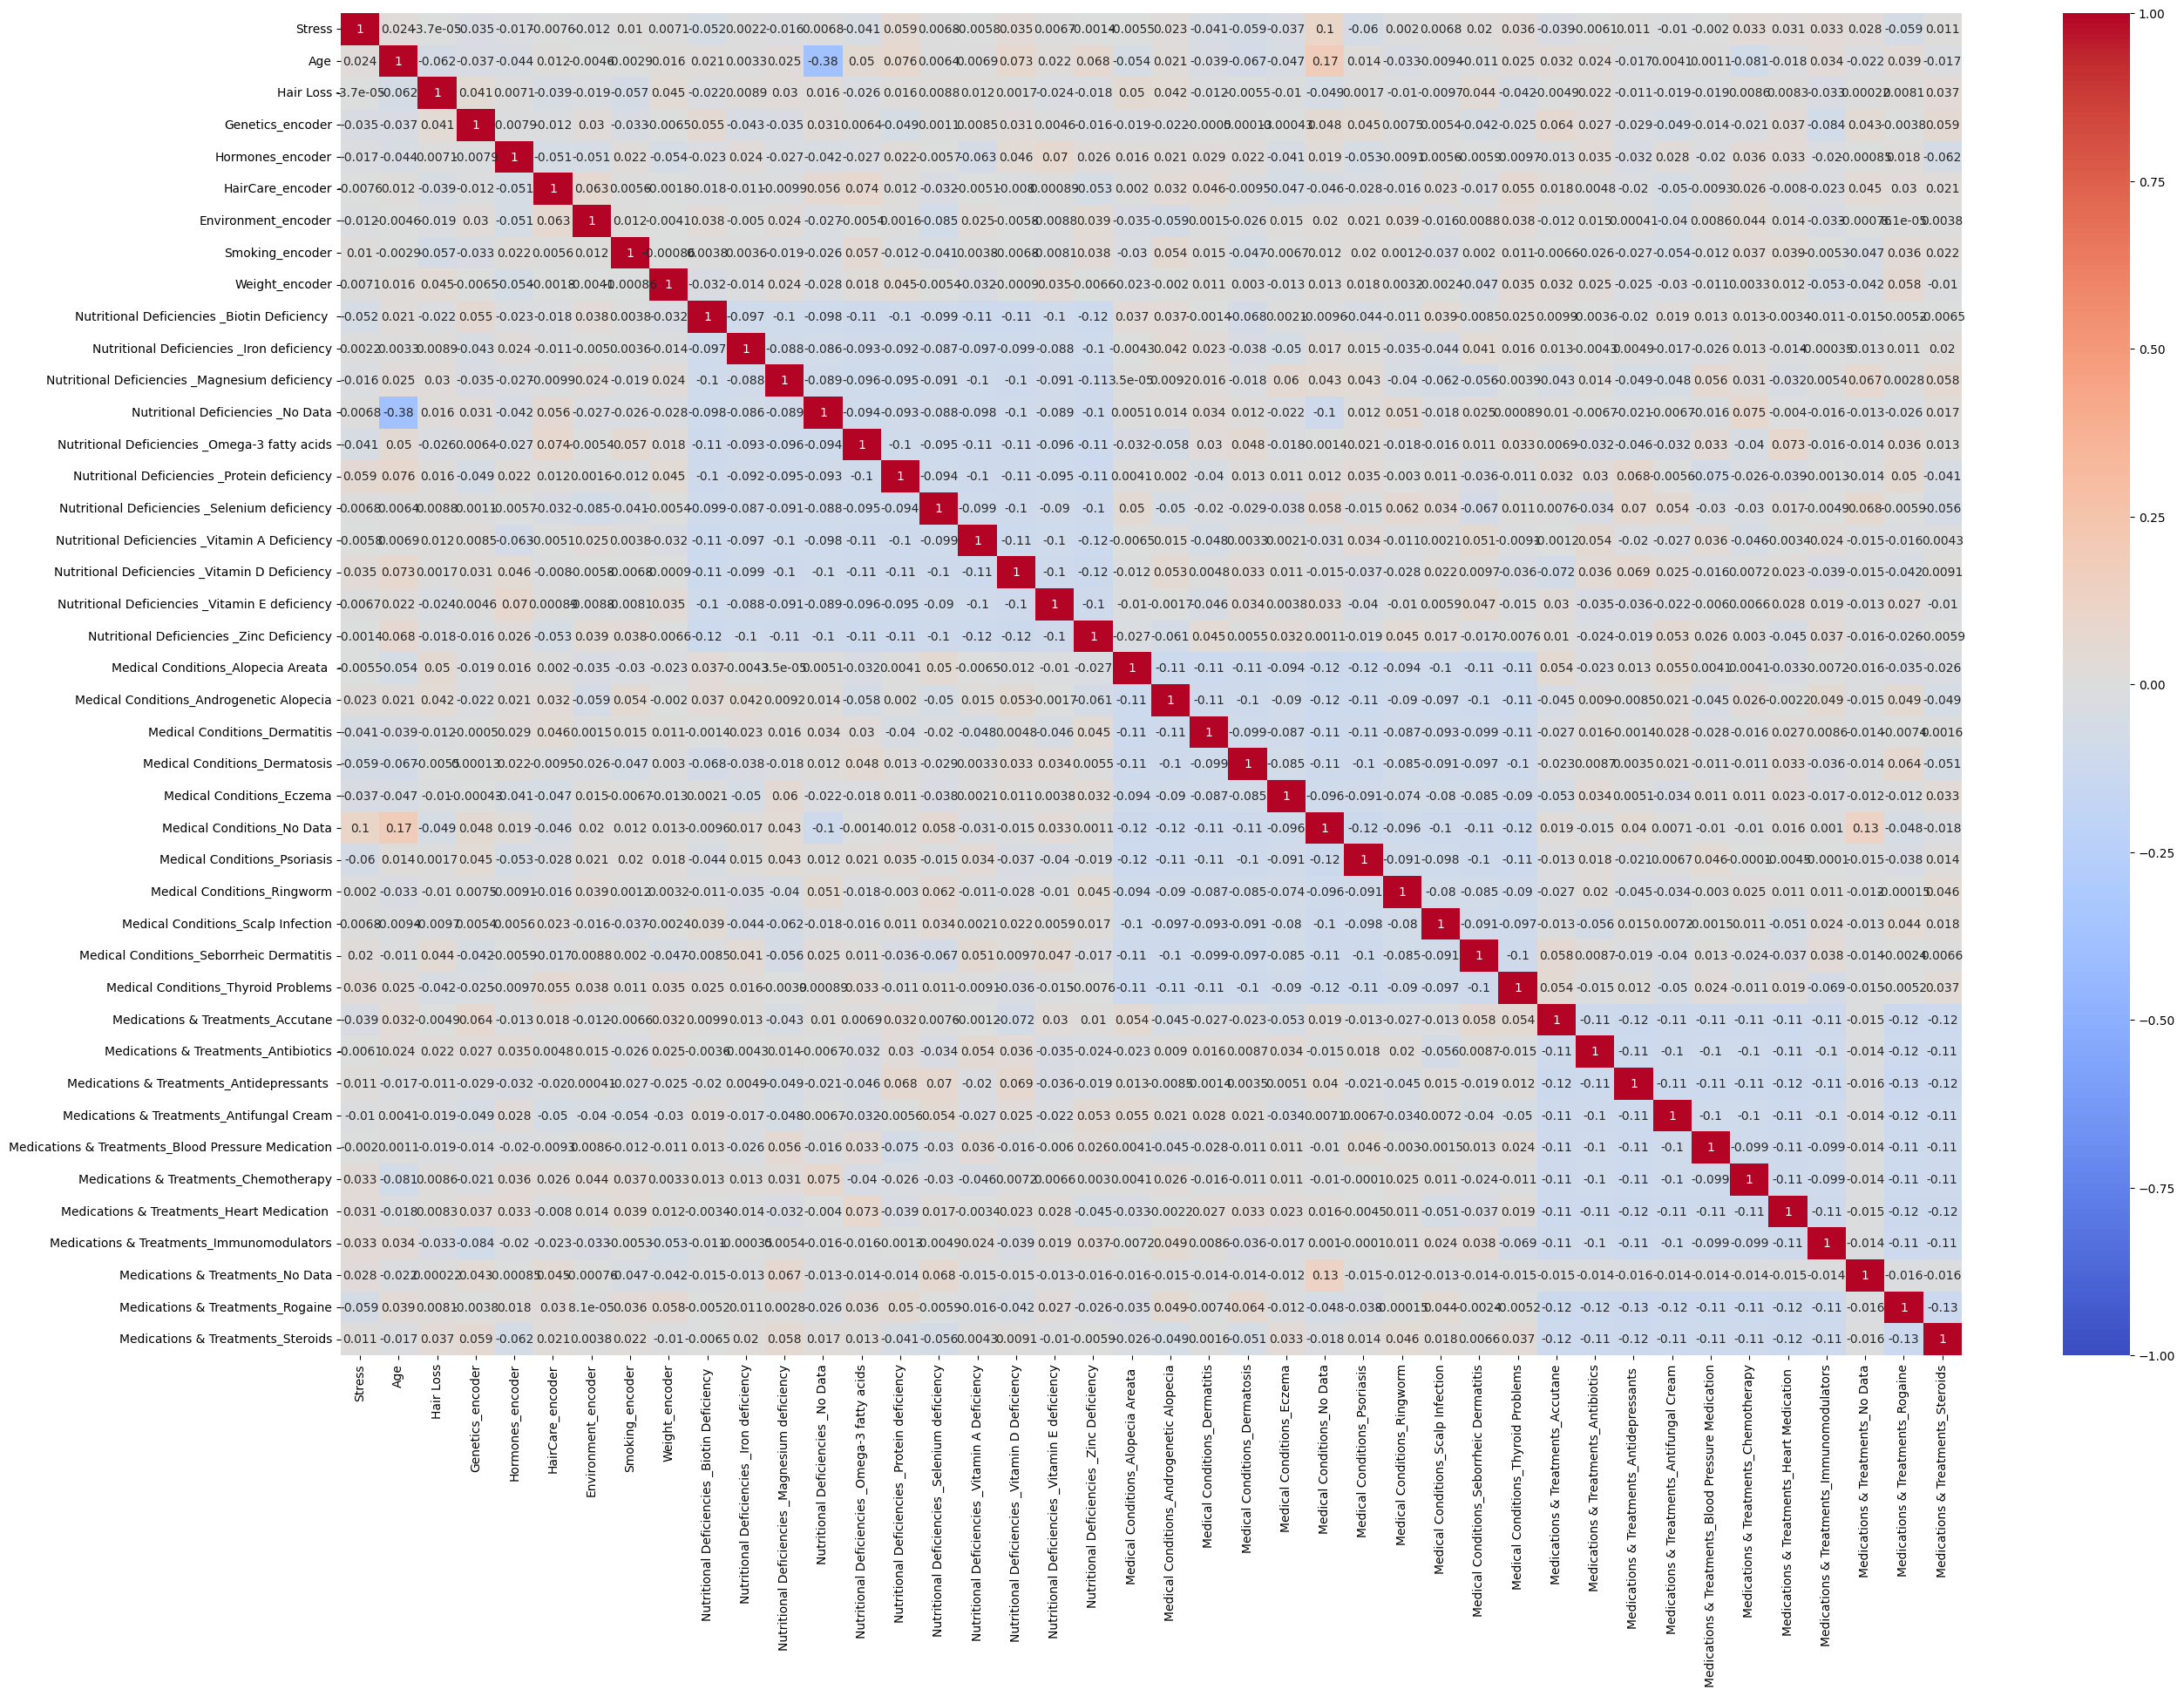

In [6]:
plt.figure(figsize=(30, 20))
sns.heatmap(df.corr(numeric_only= True), annot= True, cmap= "coolwarm", vmin=-1, )

In [7]:
sns.pairplot(df, hue = "Hair Loss")

## MODELO

In [9]:
X_lr = df.drop(columns = ["Hair Loss"])
y_lr = df["Hair Loss"]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_lr, y_lr, test_size=0.2, random_state=10)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(799, 41)
(799,)
(200, 41)
(200,)


In [13]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [14]:
predictions = model.predict(X_train)
print(predictions)

[0 1 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 1 1 1 1 0 0 0 1 1 1 1 0 1 0 1 0 0 0 0 1
 0 1 1 1 0 1 0 1 0 1 0 1 0 0 0 0 0 1 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1
 1 0 1 0 0 0 0 0 0 1 1 0 0 1 1 1 1 1 1 0 1 0 1 0 0 1 1 0 1 0 1 1 0 1 0 0 0
 0 1 1 1 0 1 0 1 1 1 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 0 1 1 1 0 0 0 0 1 0 1
 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 1 0 1 0 1
 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 1 1 1 1 1 1 0 1 0 1 1 0 0 0 0 0 1 0 0 1 1 1
 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 0 1 0 1 1 0 0 1 0 0 1 0 0 1 1 0 0 1 0 1 1 0
 1 1 0 0 1 0 1 1 1 1 0 1 0 1 0 0 1 1 1 1 1 1 0 1 0 0 1 1 0 0 1 0 1 0 0 1 1
 0 1 0 0 1 0 0 0 1 1 1 0 1 1 1 0 0 0 0 1 0 1 1 1 1 0 1 0 0 0 1 1 0 1 0 0 0
 1 0 1 1 1 0 1 0 0 0 0 0 1 1 1 0 1 0 1 0 1 1 0 1 1 0 1 1 1 0 1 0 0 0 1 0 0
 0 1 1 0 1 1 1 0 1 0 1 1 0 0 1 0 0 1 1 0 1 1 1 1 1 0 0 0 1 0 1 0 1 0 1 0 0
 0 0 0 1 1 0 0 1 0 0 0 0 1 0 1 0 1 1 0 1 0 0 0 1 1 1 0 0 1 1 1 1 1 0 1 1 1
 1 1 0 1 1 0 0 0 1 0 0 1 

In [15]:
predicions_proba = model.predict_proba(X_train)
print(np.round(np.array(predicions_proba), 2))

[[0.56 0.44]
 [0.47 0.53]
 [0.48 0.52]
 ...
 [0.41 0.59]
 [0.34 0.66]
 [0.64 0.36]]


In [16]:
modelo_log_r = LogisticRegression(max_iter = 1000)

In [18]:
model.score(X_lr, y_lr)

0.5765765765765766

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
c_matrix = confusion_matrix(y_test, y_pred)
c_matrix